## 유니콘 찾기 
### 2. 연금보험료와 직원수
- 기업의 보험료 상승 = 직원수 상승
- 연금 보험의 평균이 높은 회사가 인적 자원이 풍부한 회사가 아닐까 라는 가설
- 고점을 찾는건지, 상승률의 폭이 큰걸 찾는건지 생각을 해보자
- 근웅님 아이디어 : 2019년에 데이터가 존재하는 회사에 대해 조사해보자
- 직원 수는 예비 유니콘 기사에서 확인한 회사명을 잡플레닛에 검색 해본 결과를 토대로 <br>4명에서 150명 안팍으로 계산해보자
<br>

### 수식
- 연금보험료, 직원수
    - 연금보험료/직원수
    - 평균 월급 : 연금보험료/0.09 / 월별_직원수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

#한국어 폰트
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [2]:
uni = pd.read_csv('company_nps_data.csv')

In [3]:
uni

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [4]:
uni = uni[(uni['월별_직원수']<=150) & (uni['월별_직원수']>5)]
uni

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
3,386420,4815584,2015,11,3795900,14
7,189562,7119908,2016,1,1276900,6
8,133518,18642904,2018,10,16844840,75
9,190847,2367117,2015,12,2354660,8
...,...,...,...,...,...,...
99791,442613,1513092,2017,3,3457380,20
99793,199954,1651504,2016,1,1414960,6
99795,150135,7119441,2016,12,4872520,25
99796,171439,4630622,2017,2,2402740,11


In [5]:
#실수 설정 옵션
pd.options.display.float_format = '{:.0f}'.format

In [6]:
#월별 연금보험료 / 월별 직원수 컬럼 추가
#평균 월급 컬럼 추가 (근웅님)

uni.insert(6, '연금보험평균',uni['월별_연금보험료']//uni['월별_직원수'])
uni['평균월급']=uni['월별_연금보험료']*100/9/uni['월별_직원수']
uni

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연금보험평균,평균월급
0,233757,41688077,2018,7,8912380,36,247566,2750735
3,386420,4815584,2015,11,3795900,14,271135,3012619
7,189562,7119908,2016,1,1276900,6,212816,2364630
8,133518,18642904,2018,10,16844840,75,224597,2495532
9,190847,2367117,2015,12,2354660,8,294332,3270361
...,...,...,...,...,...,...,...,...
99791,442613,1513092,2017,3,3457380,20,172869,1920767
99793,199954,1651504,2016,1,1414960,6,235826,2620296
99795,150135,7119441,2016,12,4872520,25,194900,2165564
99796,171439,4630622,2017,2,2402740,11,218430,2427010


In [7]:
#사용하지 않을 컬럼 제거
df_uni = uni.drop(['연매출액', '월별_연금보험료'], axis = 1).round()
df_uni

,회사ID,년도,월,월별_직원수,연금보험평균,평균월급
0,233757,2018,7,36,247566,2750735
3,386420,2015,11,14,271135,3012619
7,189562,2016,1,6,212816,2364630
8,133518,2018,10,75,224597,2495532
9,190847,2015,12,8,294332,3270361
...,...,...,...,...,...,...
99791,442613,2017,3,20,172869,1920767
99793,199954,2016,1,6,235826,2620296
99795,150135,2016,12,25,194900,2165564
99796,171439,2017,2,11,218430,2427010


In [8]:
df_uni.sort_values(['연금보험평균'], ascending = False)

,회사ID,년도,월,월별_직원수,연금보험평균
11025,126831,2018,8,584,419253.0
87631,126831,2018,7,584,419253.0
77709,126831,2018,9,584,419253.0
91333,126831,2018,11,583,419250.0
36021,126831,2018,10,584,419123.0
...,...,...,...,...,...
43859,380943,2016,2,344,103486.0
26409,380943,2016,1,348,103454.0
594,394697,2016,6,198,102933.0
38881,470461,2015,11,131,95893.0


In [8]:
df_uni['연금보험평균'].value_counts()

240937    18
108000    17
253860    16
229880    16
150000    16
          ..
210406     1
307213     1
296970     1
335865     1
278520     1
Name: 연금보험평균, Length: 39671, dtype: int64

In [9]:
# 연도와 월을 묶어서 컬럼 형성
df_uni['날짜'] = pd.to_datetime(df_uni['년도'].astype(str) + df_uni['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

df_uni

,회사ID,년도,월,월별_직원수,연금보험평균,평균월급,날짜
0,233757,2018,7,36,247566,2750735,201807
3,386420,2015,11,14,271135,3012619,201511
7,189562,2016,1,6,212816,2364630,201601
8,133518,2018,10,75,224597,2495532,201810
9,190847,2015,12,8,294332,3270361,201512
...,...,...,...,...,...,...,...
99791,442613,2017,3,20,172869,1920767,201703
99793,199954,2016,1,6,235826,2620296,201601
99795,150135,2016,12,25,194900,2165564,201612
99796,171439,2017,2,11,218430,2427010,201702


In [10]:
df_uni = df_uni.drop_duplicates(['연금보험평균'])

In [11]:
df_uni.sort_values(['연금보험평균'], ascending = False).head(10)

,회사ID,년도,월,월별_직원수,연금보험평균,평균월급,날짜
785,228293,2016,8,16,479821,5331347,201608
21095,422500,2018,9,8,414482,4605361,201809
30744,422500,2018,7,7,413522,4594698,201807
7404,443698,2019,9,21,413453,4593926,201909
13824,60154,2018,7,6,409080,4545333,201807
5631,147546,2018,8,27,406102,4512247,201808
82,420304,2018,10,127,404417,4493528,201810
95345,420304,2018,11,126,404284,4492048,201811
30111,420304,2018,12,125,404148,4490544,201812
4717,29171,2018,2,7,404100,4490000,201802


In [14]:
#연금보험 평균 높은 리스트 228293, 422500, 443698, 60154, 147546, 420304, 29171

In [18]:
def lineploting(df_uni, x):
    df_num = df_uni.groupby('회사ID').get_group(x).sort_values(['날짜'])
    print("회사ID", x)
    f, ax = plt.subplots(1,1, figsize = (15,8))
    plt.plot(df_num['날짜'].sort_values(), df_num['연금보험평균'])
    plt.xticks(rotation=45)
    plt.title('날짜별 연금보험평균', fontsize=20)
    plt.show()

회사ID 228293


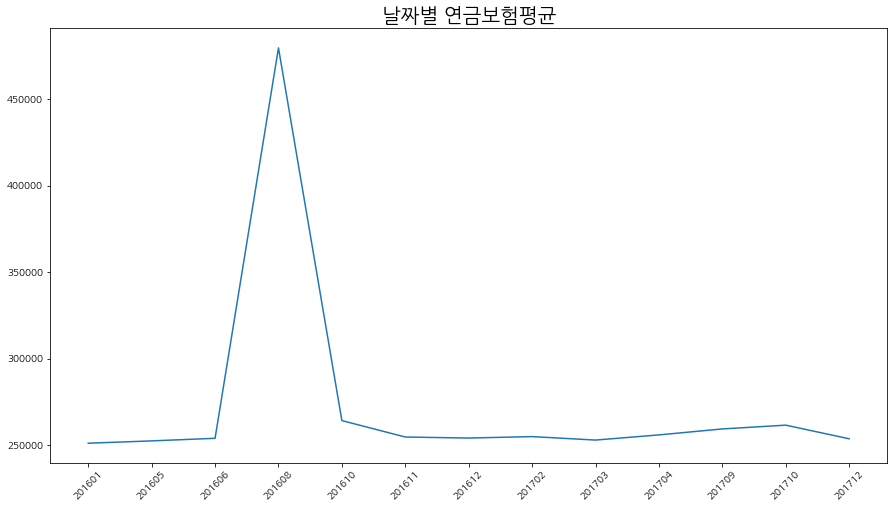

회사ID 422500


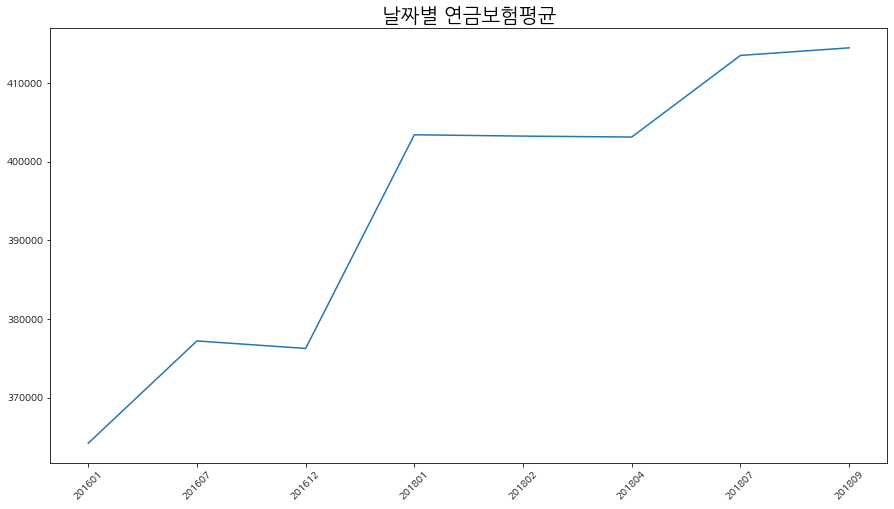

회사ID 443698


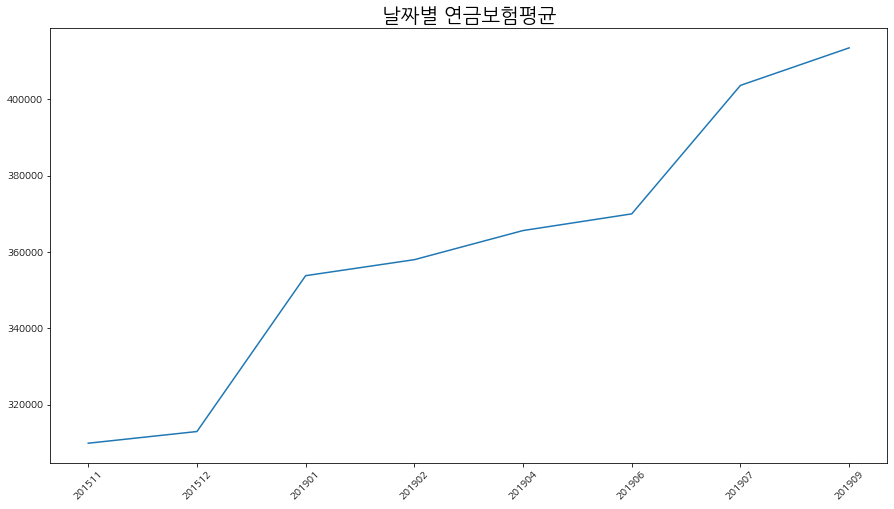

회사ID 60154


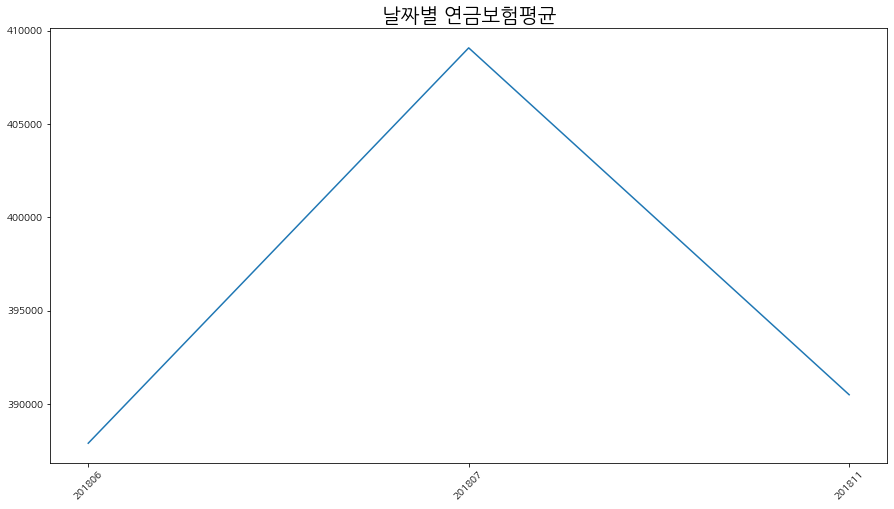

회사ID 147546


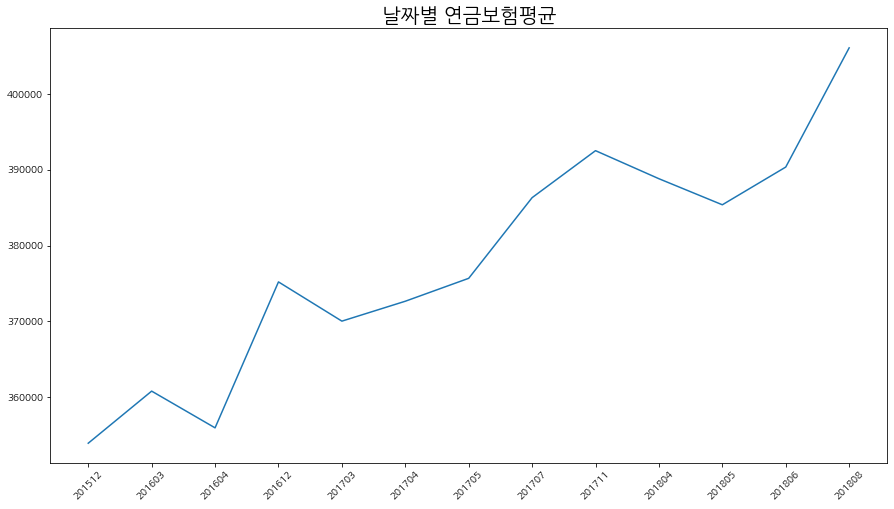

회사ID 420304


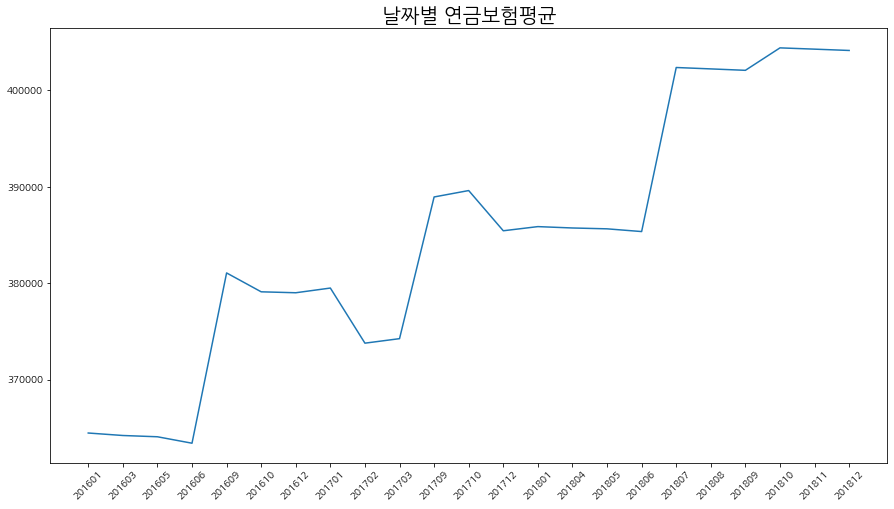

회사ID 29171


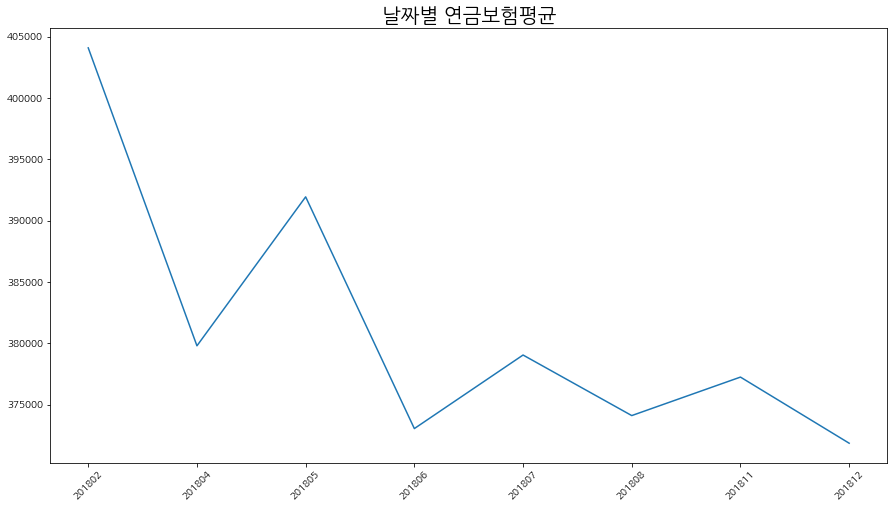

In [19]:
com_list = [228293, 422500, 443698, 60154, 147546, 420304, 29171]

for x in com_list:
    lineploting(df_uni, x)

- 고점을 찍은 기업은 어떻게 생각해야 할까
- 근웅님 의견 대로 날짜가 긴 기업을 중점적으로 볼 필요가 있지 않을까
- 그래프 미관 보강
- 년도가 끊긴 데이터들을 보강하고 2019년 데이터가 존재하는 기업 위주로 다시 찾자!


## 평균 월급
- 곧 추가해서 넣겠습니다